In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
path_to_csv = "diabetes.csv"

In [7]:
data = pd.read_csv(path_to_csv)

In [8]:
data

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,False
764,2,122,70,27,0,36.8,0.340,27,False
765,5,121,72,23,112,26.2,0.245,30,False
766,1,126,60,0,0,30.1,0.349,47,True


In [9]:
data.shape

(768, 9)

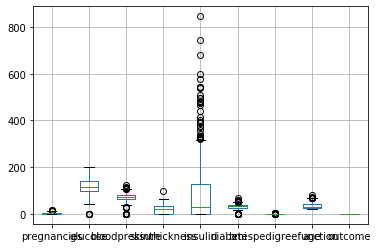

In [10]:
data.boxplot()

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

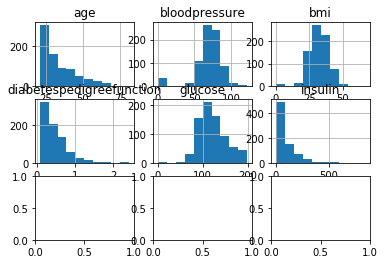

In [13]:
data.hist()


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np


In [16]:
df = data.copy()

In [17]:
df

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,False
764,2,122,70,27,0,36.8,0.340,27,False
765,5,121,72,23,112,26.2,0.245,30,False
766,1,126,60,0,0,30.1,0.349,47,True


In [18]:
dq = df.iloc[:,1:8]

In [19]:
for i in df.columns[1:8]:
    df[i].replace(0,np.nan,inplace = True)
    m = df[i].mean()
    df[i].replace(np.nan,m,inplace = True)

In [20]:
df

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,True
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,False
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,True
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,False
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,True
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,False
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,False
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,False
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,True


In [23]:
df.head().shape


(5, 9)

In [22]:
df.tail()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,False
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,False
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,False
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,True
767,1,93.0,70.0,31.00000,155.548223,30.4,0.315,23,False


In [24]:
df.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [25]:
df.describe(include = "all")


,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,NaN
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,NaN
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,NaN
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,NaN
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,NaN
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,NaN


In [26]:
x = np.array(df.drop('outcome',axis = 1))


In [28]:
y = np.array(df['outcome'])

In [29]:
y = np.array(df['outcome'])

In [31]:
s = StandardScaler()

In [32]:
print(x)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [33]:
x_scale = s.fit_transform(x)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_scale,y,random_state = 0,test_size = 0.2)

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
conf_mat = confusion_matrix(y_test, y_pred)

NameError: name 'confusion_matrix' is not defined